## Assignment 3
### Sneha S

## Problem Statement: Abalone Age Prediction

Description:- Predicting the age of abalone from physical measurements. The age of abalone is
determined by cutting the shell through the cone, staining it, and counting the number of rings through
a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain,
are used to predict age. Further information, such as weather patterns and location (hence food
availability) may be required to solve the problem.


Building a Regression Model
1. Download the dataset: Dataset
2. Load the dataset into the tool.
3. Perform Below Visualizations.
∙ Univariate Analysis
∙ Bi-Variate Analysis
∙ Multi-Variate Analysis
4. Perform descriptive statistics on the dataset.
5. Check for Missing values and deal with them.
6. Find the outliers and replace them outliers
7. Check for Categorical columns and perform encoding. 
8. Split the data
into dependent and independent variables.
9. Scale the independent
variables
10. Split the data into training and testing
11. Build the Model
12. Train the Model
13. Test the Model
14. Measure the performance using Metrics.

In [3]:
# importing the necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [4]:
#1,2
data = pd.read_csv(r"abalone.csv")
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


From problem statement and feature discription, let's first compute the target varible of the problem ' Age' and assign it to the dataset. Age = 1.5+Rings

In [7]:
data['Age'] = data['Rings'] + 1.5
data.drop('Rings', axis = 1, inplace = True)
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


Text(0, 0.5, 'Count')

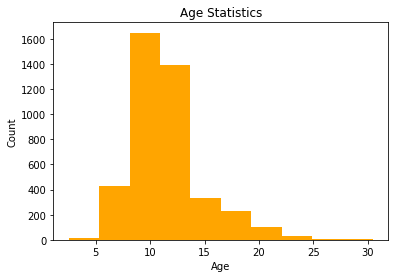

In [10]:
#3
#i) Univariate Analysis

plt.hist(data['Age'],color='orange')
plt.title('Age Statistics')
plt.xlabel('Age')
plt.ylabel('Count')

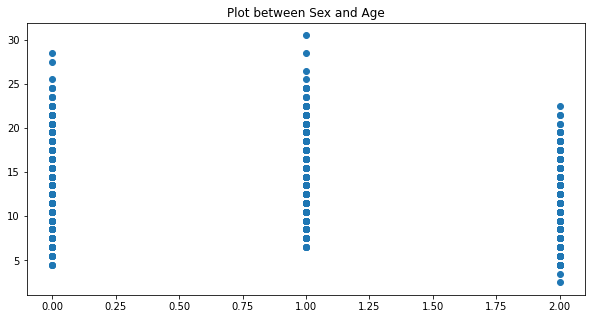

In [14]:
#3b - bivariate
# plotting a line plot after changing it's width and height
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)

plt.scatter(data['Sex'],data['Age'])
plt.title('Plot between Sex and Age')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f69ce362210>,
      dtype=object)

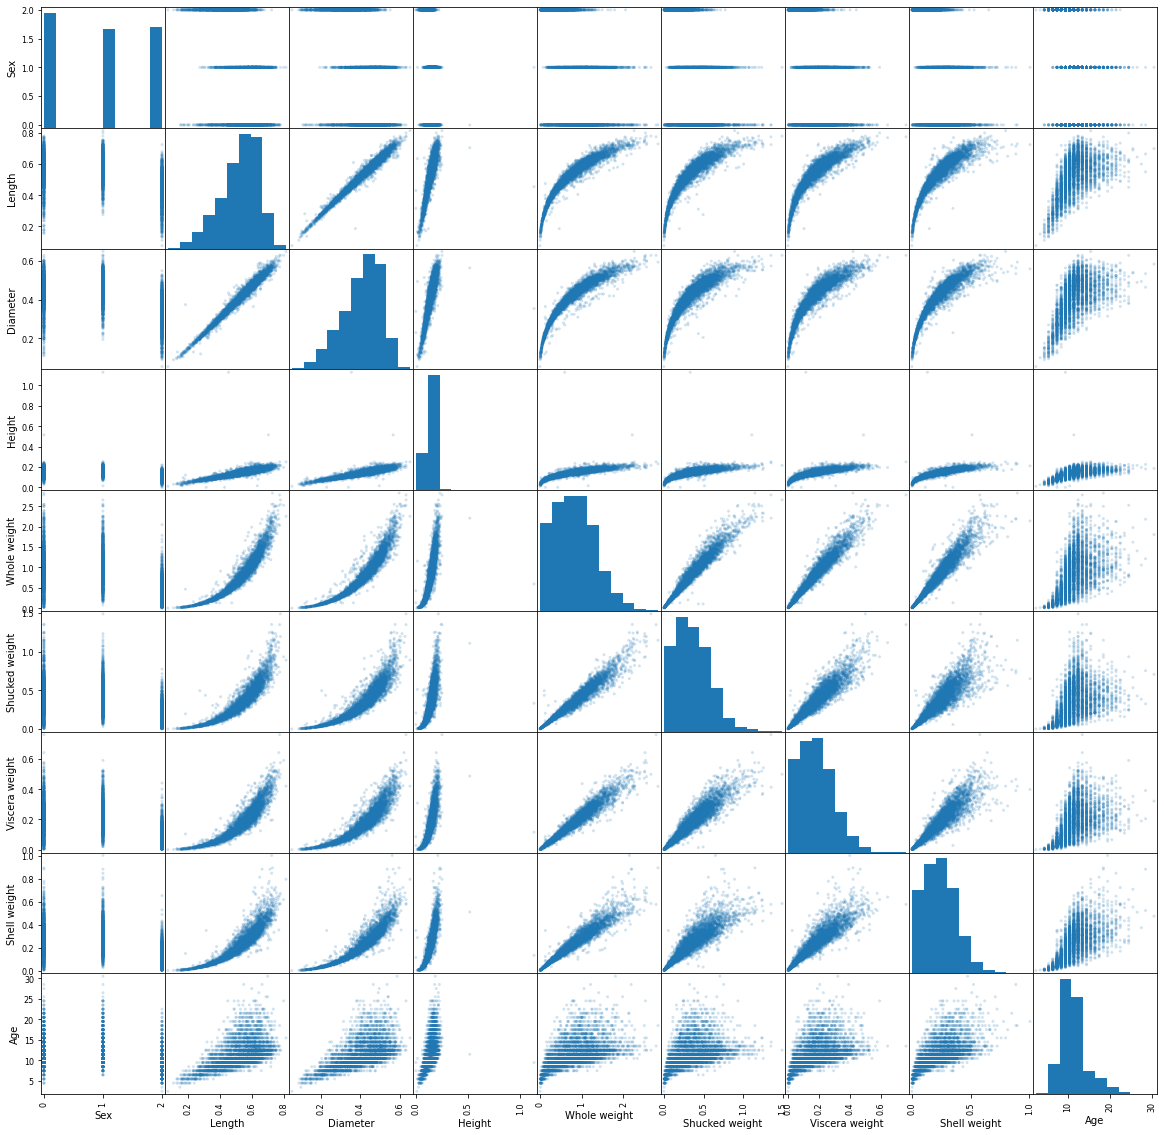

In [13]:
#3c - multivariate
pd.plotting.scatter_matrix(data, alpha=0.2, figsize=(20,20))

In [19]:
#4
data.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.955470,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,11.433684
std,0.827815,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,9.500000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,10.500000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,12.500000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,30.500000


In [16]:
#5 - handling missing values
data.isnull().sum()     #prints the count of missing values

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Age               0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


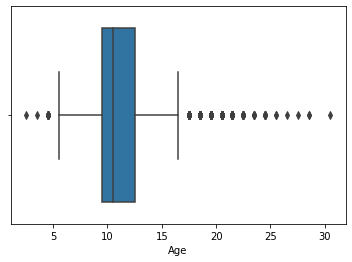

In [22]:
#6 Outlier detection - box plot
import seaborn as sns
sns.boxplot(data['Age'])

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


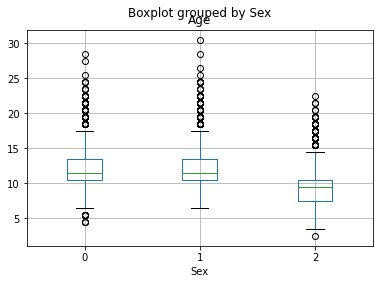

In [23]:
data.boxplot(column = 'Age', by = "Sex")

In [34]:
#6 Outlier removal
columns = ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight','Shell weight']
for i in columns:
        Q1=data[i].quantile(0.25)
        Q3=data[i].quantile(0.75)
        IQR=Q3-Q1
        upper=Q3+1.5*IQR
        lower=Q1-1.5*IQR
        data[i]=np.where(data[i] >upper, upper, data[i])
        data[i]=np.where(data[i] <lower, lower, data[i])

In [35]:
#After outlier removal
columns = ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight','Shell weight']

for i in columns:
  Q1 = data[i].quantile(0.25)
  Q3 = data[i].quantile(0.75)
  IQR = Q3 - Q1
  upper=Q3 + 1.5 * IQR
  lower=Q1 - 1.5 * IQR
  count = np.size(np.where(data[i] >upper))
  count = count + np.size(np.where(data[i] <lower))
  print('No. of outliers in ', i, ' : ', count)

No. of outliers in  Length  :  0
No. of outliers in  Diameter  :  0
No. of outliers in  Height  :  0
No. of outliers in  Whole weight  :  0
No. of outliers in  Shucked weight  :  0
No. of outliers in  Viscera weight  :  0
No. of outliers in  Shell weight  :  0


In [37]:
#7
data['Sex'].value_counts()
data['Sex'].replace(['M', 'F', 'I'], [0, 1, 2], inplace = True)
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


In [39]:
data.dtypes

Sex                 int64
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Age               float64
dtype: object

In [41]:
#8 
X = data.iloc[:, :-1]
print('Independent : ', X.head)

Y = data.iloc[:, -1]
print('Dependent : ', Y.head)

Independent :  <bound method NDFrame.head of       Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0       0   0.455     0.365   0.095        0.5140          0.2245   
1       0   0.350     0.265   0.090        0.2255          0.0995   
2       1   0.530     0.420   0.135        0.6770          0.2565   
3       0   0.440     0.365   0.125        0.5160          0.2155   
4       2   0.330     0.255   0.080        0.2050          0.0895   
...   ...     ...       ...     ...           ...             ...   
4172    1   0.565     0.450   0.165        0.8870          0.3700   
4173    0   0.590     0.440   0.135        0.9660          0.4390   
4174    0   0.600     0.475   0.205        1.1760          0.5255   
4175    1   0.625     0.485   0.150        1.0945          0.5310   
4176    0   0.710     0.555   0.195        1.9485          0.9455   

      Viscera weight  Shell weight  
0             0.1010        0.1500  
1             0.0485        0.0700  
2             0

In [42]:
#9
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
print('Before scaling : \n', X[1:3])
X = scaler.fit_transform(X)
print('\n\nAfter scaling : \n', X[1:3])

Before scaling : 
    Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
1    0    0.35     0.265   0.090        0.2255          0.0995   
2    1    0.53     0.420   0.135        0.6770          0.2565   

   Viscera weight  Shell weight  
1          0.0485          0.07  
2          0.1415          0.21  


After scaling : 
 [[-0.5        -1.18181818 -1.23076923 -1.         -0.80674631 -0.74841772
  -0.76802508 -0.8241206 ]
 [ 0.         -0.09090909 -0.03846154 -0.1        -0.17217147 -0.25158228
  -0.18495298 -0.12060302]]


In [59]:
#10
from sklearn.model_selection import train_test_split 
X = data.iloc[:, :-1]
Y = data.iloc[:, -1]
x_train1, x_test1, y_train1, y_test1 = train_test_split(X, Y, test_size = 0.25) 
#x_train1 = x_train1.values.reshape(-1,1)
x_train1

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
3305,2,0.600,0.445,0.175,1.0570,0.3830,0.2160,0.355
12,0,0.490,0.380,0.135,0.5415,0.2175,0.0950,0.190
398,0,0.535,0.440,0.150,0.6765,0.2560,0.1390,0.260
1937,0,0.625,0.515,0.170,1.3310,0.5725,0.3005,0.361
445,1,0.560,0.455,0.190,0.7140,0.2830,0.1290,0.275
...,...,...,...,...,...,...,...,...
749,0,0.695,0.515,0.175,1.5165,0.5780,0.4105,0.390
3297,0,0.645,0.500,0.190,1.2290,0.5240,0.2780,0.395
1135,2,0.570,0.440,0.150,0.7550,0.3425,0.1600,0.224
4107,2,0.420,0.305,0.100,0.3415,0.1645,0.0775,0.086


In [60]:
y_train1.head()

3305    17.5
12      12.5
398     13.5
1937    10.5
445     10.5
Name: Age, dtype: float64

In [61]:
#11
from sklearn import linear_model as lm
model1 = lm.LinearRegression()


In [62]:
#12
results1 = model1.fit(x_train1, y_train1)

In [72]:
#13
#x_test1 = x_test1.values.reshape(-1,1)
accuracy1 = model1.score(x_train1, y_train1)
y_pred = model1.predict(x_test1)
accuracy1

0.5435878584933573

In [73]:
#14
#Metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

r2 = r2_score(y_test1, y_pred)
mean_squared_error = mean_squared_error(y_test1, y_pred)
rmse = (np.sqrt(mean_squared_error))

print('R2 score : ', r2)
print('Mean squared error : ', mean_squared_error)
print('Root Mean squared error : ', rmse)

R2 score :  0.5466857767229564
Mean squared error :  4.7807432689199425
Root Mean squared error :  2.1864910859456854
